In [221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Creating lists for column names for both datasets

In [181]:
header_clicks = ["userId", "time", "productId", "availability", "pos", "count"]
header_impression = ["userId", "time", "productId", "categoryName", "offers", "count"]

Uploading the data to dataframes

In [182]:
data_clicks = pd.read_csv("click.csv", sep = ";", names = header_clicks)

In [183]:
data_impression = pd.read_csv("impress.csv", sep = ";", names = header_impression)

"Click" data exploration

In [184]:
data_clicks.head()

,userId,time,productId,availability,pos,count
0,-1004940724779872737,15:04:22,4065922,at_depot,0,1
1,-1006277599976110084,16:04:40,\N,in_week,40,1
2,-1009998163369194601,15:25:43,6101440,in_three_days,2,1
3,-101111767667825723,15:32:54,\N,at_depot,1,1
4,-101111767667825723,15:33:28,\N,in_week,3,1


In [185]:
data_clicks.describe()

,userId,count
count,2.213400e+04,22134.000000
mean,-5.024653e+16,1.003569
std,5.318503e+18,0.066785
min,-9.223074e+18,1.000000
25%,-4.617988e+18,1.000000
50%,-2.511210e+16,1.000000
75%,4.525236e+18,1.000000
max,9.223221e+18,4.000000


In [186]:
data_clicks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22134 entries, 0 to 22133
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   userId        22134 non-null  int64 
 1   time          22134 non-null  object
 2   productId     22134 non-null  object
 3   availability  22134 non-null  object
 4   pos           22134 non-null  object
 5   count         22134 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.0+ MB


Checking all the possible number of clicks for products (count column)

In [187]:
data_clicks['count'].unique()

array([1, 2, 4, 3], dtype=int64)

Replacing /N values with NaNs, converting "pos" and "productID" column type to float in "click" dataset

In [188]:
def cleaning_function(dataframe):
    
    # Checking for \\N values and replacing them with NaNs
    if dataframe[dataframe == '\\N'].count().sum() > 0:
        dataframe.replace('\\N', np.NaN, inplace = True)
        
    # Converting "pos" column into "float" type, because there are NaNs in this column
    dataframe["pos"] = dataframe["pos"].astype(float)
    dataframe["productId"] = dataframe["productId"].astype(float)
    return dataframe.head()

In [189]:
cleaning_function(data_clicks)

C:\Users\Denys\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,userId,time,productId,availability,pos,count
0,-1004940724779872737,15:04:22,4065922.0,at_depot,0.0,1
1,-1006277599976110084,16:04:40,NaN,in_week,40.0,1
2,-1009998163369194601,15:25:43,6101440.0,in_three_days,2.0,1
3,-101111767667825723,15:32:54,NaN,at_depot,1.0,1
4,-101111767667825723,15:33:28,NaN,in_week,3.0,1


"Impress" data exploration

In [190]:
data_impression.head()

,userId,time,productId,categoryName,offers,count
0,-1000667737595868520,16:53:28,5345155,Outdoorové batohy,18,1
1,-1000986301389262527,16:11:23,929457,Letní osobní pneu,66,1
2,-1001489680877270341,15:36:57,5841880,Chytré hodinky,107,1
3,-1004940724779872737,15:04:13,4065922,Kanalizační potrubí,2,1
4,-100703232129898231,15:29:23,488638,Homeopatika,39,1


In [191]:
data_impression.describe()

,userId,productId,offers,count
count,4.321300e+04,4.321300e+04,43213.000000,43213.000000
mean,2.947081e+16,4.869003e+06,21.862079,1.000301
std,5.367088e+18,1.646184e+06,22.362830,0.017342
min,-9.222775e+18,2.890000e+02,0.000000,1.000000
25%,-4.654623e+18,4.373360e+06,6.000000,1.000000
50%,7.667035e+16,5.437084e+06,14.000000,1.000000
75%,4.719855e+18,6.102281e+06,30.000000,1.000000
max,9.223221e+18,6.407747e+06,220.000000,2.000000


In [192]:
data_impression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43213 entries, 0 to 43212
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   userId        43213 non-null  int64 
 1   time          43213 non-null  object
 2   productId     43213 non-null  int64 
 3   categoryName  42775 non-null  object
 4   offers        43213 non-null  int64 
 5   count         43213 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 2.0+ MB


Checking all the possible numbers of impressions for products (count column)

In [193]:
data_impression['count'].unique()

array([1, 2], dtype=int64)

Looking for NaNs and \\N in "impress" dataset

In [194]:
data_impression.isnull().sum().sum()

438

In [195]:
data_impression[data_impression == "\\N"].count().sum()

C:\Users\Denys\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


0

Converting productId column to float, so we are able to merge both tables on userId and productId keys

In [196]:
data_impression["productId"] = data_impression["productId"].astype(float)

'Groupby' impressions by userId, productId and counting "counts" for each pair of userId-productId

In [197]:
data_impression_grouped = data_impression.groupby(['userId', 'productId'], as_index=False)['count'].sum()

'Groupby' clicks by userId, productId and counting "counts" for each pair of userId-productId

In [198]:
data_clicks_grouped = data_clicks.groupby(['userId', 'productId'], as_index=False)['count'].sum()

Merging both datasets on productId and userId keys

In [199]:
merged_table = pd.merge(data_impression_grouped, data_clicks_grouped, how = 'inner', on = ['userId', 'productId'])

In [200]:
merged_table.head()

,userId,productId,count_x,count_y
0,-9215435674403555063,5771559.0,1,1
1,-9215083170802076780,1452213.0,2,1
2,-9214543223130417939,6270238.0,1,1
3,-9210671091637248855,5601090.0,3,1
4,-9209509735622740821,3930109.0,1,1


'Groupby' merged table by productId and counting "counts" for impressions and clicks for each product 

In [201]:
merged_table_grouped = merged_table.groupby(['productId'], as_index=False)['count_x', 'count_y'].sum()

C:\Users\Denys\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [202]:
merged_table_grouped.head()

,productId,count_x,count_y
0,1639.0,2,3
1,2409.0,4,2
2,2834.0,1,1
3,6181.0,1,2
4,6299.0,1,3


Otazka c.1: U jakého produktu je nejlepší poměr kliků na zobrazení?

In [203]:
merged_table_grouped['pomer_kliku_k_zobrazeni'] = merged_table_grouped['count_y'] / merged_table_grouped['count_x']

In [204]:
merged_table_grouped.head()

,productId,count_x,count_y,pomer_kliku_k_zobrazeni
0,1639.0,2,3,1.5
1,2409.0,4,2,0.5
2,2834.0,1,1,1.0
3,6181.0,1,2,2.0
4,6299.0,1,3,3.0


In [260]:
merged_table_grouped.sort_values(by=['pomer_kliku_k_zobrazeni'], ascending = False).head()

,productId,count_x,count_y,pomer_kliku_k_zobrazeni
3224,5493079.0,1,19,19.0
4489,6065069.0,1,15,15.0
5427,6302838.0,1,13,13.0
4964,6196684.0,1,13,13.0
1406,4144487.0,1,13,13.0


Odpoved na otazku c.1: if we agree, that one user could do more than one click on the same product after only impression, so the most clickable product is Alu Kola with id = 5493079.

If we don't agree: every ratio, which is higher than one, is not relevant for us, because it means, that one user in term of one session made more than one click on the same product. So we assume, that we are interested in ration, that is not higher than 100 % (1.0).

In [261]:
merged_table_grouped[merged_table_grouped['pomer_kliku_k_zobrazeni'] == 1.0].head()

,productId,count_x,count_y,pomer_kliku_k_zobrazeni
2,2834.0,1,1,1.0
5,7490.0,2,2,1.0
6,7702.0,1,1,1.0
9,10232.0,1,1,1.0
10,10334.0,1,1,1.0


In this case there are 2904 products, which ratio is 100 %.

Some preparations for answering the second question:

In [207]:
data_impression_grouped_with_categories = data_impression.groupby(['userId', 'productId', 'categoryName'], as_index=False)['count'].sum()

Merging impressions and clicks datasets:

In [208]:
merged_table_2 = pd.merge(data_impression_grouped_with_categories, data_clicks_grouped, how = 'inner', on = ['userId', 'productId'])

Grouping by "Category name" and summarize the count numbers

In [210]:
merged_table_2_grouped = merged_table_2.groupby(['categoryName'], as_index=False)['count_x', 'count_y'].sum()

C:\Users\Denys\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [215]:
merged_table_2_grouped.to_excel('merged_table.xlsx')

In [211]:
merged_table_2_grouped.head()

,categoryName,count_x,count_y
0,3D brýle,2,1
1,4x4 pneu,9,25
2,AV přijímače,5,7
3,Absorpční podložky,3,3
4,Adaptéry k notebookům,5,8


Sorting by impressions and clicks to define the most clickable and viewed categories

In [213]:
merged_table_2_grouped.sort_values(by=['count_x'], ascending = False).head()

,categoryName,count_x,count_y
664,"Ochranné masky, roušky a respirátory",583,675
578,Mobilní telefony,493,494
1174,Televizory,244,283
1065,Set top boxy,226,214
521,Letní osobní pneu,121,140


In [214]:
merged_table_2_grouped.sort_values(by=['count_y'], ascending = False).head()

,categoryName,count_x,count_y
664,"Ochranné masky, roušky a respirátory",583,675
578,Mobilní telefony,493,494
1174,Televizory,244,283
1065,Set top boxy,226,214
521,Letní osobní pneu,121,140


Otazka c.2: která kategorie je nejproklikávanější a která nejzobrazovanější?

Odpoved na otazku c.2: Nejzobrazovanejsi kategorie je "Ochranné masky, roušky a respirátory", nejproklikavanejsi tedy take je "Ochranné masky, roušky a respirátory".

Some preparations for answering the third question:

In [262]:
data_impression_grouped_with_offers = data_impression.groupby(['userId', 'productId', 'offers'], as_index=False)['count'].sum()
data_impression_grouped_with_offers = data_impression.groupby(['productId', 'offers'], as_index=False)['count'].sum()

In [263]:
data_clicks_grouped_offers = data_clicks.groupby(['userId', 'productId'], as_index=False)['count'].sum()
data_clicks_grouped_offers = data_clicks_grouped_offers.groupby(['productId'], as_index=False)['count'].sum()

In [264]:
merged_table_3 = pd.merge(data_impression_grouped_with_offers, data_clicks_grouped_offers, how = 'inner', on = ['productId'])

In [266]:
merged_table_3.head(10)

,productId,offers,count_x,count_y
0,1639.0,50,4,3
1,2409.0,2,5,2
2,2834.0,31,3,1
3,4088.0,89,2,1
4,6181.0,21,1,2
5,6299.0,15,1,3
6,7490.0,9,2,2
7,7702.0,9,1,1
8,7928.0,23,1,3
9,9899.0,92,1,2


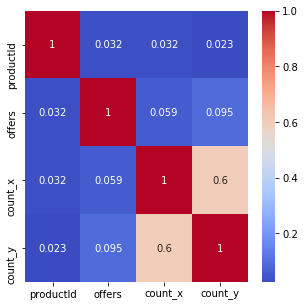

In [267]:
corr_matrix = merged_table_3.corr().abs()
plt.figure(figsize=(5,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

(0, 20)

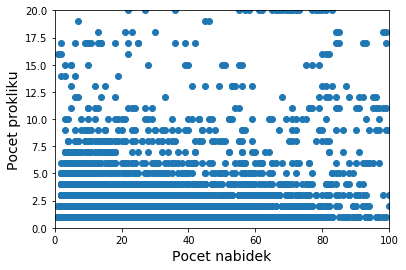

In [269]:
plt.scatter(merged_table_3['offers'], merged_table_3['count_y'])
plt.xlabel('Pocet nabidek',fontsize=14)
plt.ylabel('Pocet prokliku',fontsize=14)
plt.xlim(0, 100)
plt.ylim(0, 20)

Otazka c.3: Má počet nabídek produktu nějaký vliv na jeho proklikovost?

Odpoved na otazku c.3: Nema, korelacni index je kolem 0.0095, tudiz neni to zadna souvislot. Linearni zavislost take neni (je to videt na grafu).

Otazka c.4: Jaké další zajímavé otázky vás nad danou datovou sadou napadají?

Odpodev na otazku c.4: 
- Jak  daleko uzivateli scrollujou stranku s vysledky po jednotlivych zbozi? (zprumernena "pos" pro dane zbozi)
- Má pozice produktu nějaký vliv na jeho proklikovost?